In [1]:
import pandas as pd

In [11]:
import datashader as ds

In [16]:
import datashader.transfer_functions as tf

In [2]:
import pymongo
from pymongo import MongoClient

client = MongoClient("mongodb://localhost:27017/")

In [4]:
mydb = client.Taxi_Database

In [5]:
green_df = pd.DataFrame(list(mydb.green_2015_data.find({})))
green_df.head()

,Dropoff_latitude,Dropoff_longitude,Ehail_fee,Extra,Fare_amount,Lpep_dropoff_datetime,MTA_tax,Passenger_count,Payment_type,Pickup_latitude,...,Store_and_fwd_flag,Tip_amount,Tolls_amount,Total_amount,Trip_distance,Trip_type,VendorID,_id,improvement_surcharge,lpep_pickup_datetime
0,40.708878,-73.836334,NaN,0.5,6.5,2015-12-01 00:18:18,0.5,1,1,40.721508,...,N,1.56,0.0,9.36,1.27,1,2,5d7bb6ca5732018bf60641f5,0.3,2015-12-01 00:12:54
1,40.691143,-73.863670,NaN,0.5,12.5,2015-12-01 00:59:31,0.5,1,1,40.699657,...,N,2.00,0.0,15.80,3.57,1,2,5d7bb6ca5732018bf60641f6,0.3,2015-12-01 00:48:19
2,40.824123,-73.925980,NaN,0.5,13.5,2015-12-01 00:20:40,0.5,2,1,40.805641,...,N,4.44,0.0,19.24,3.51,1,2,5d7bb6ca5732018bf60641f7,0.3,2015-12-01 00:06:13
3,40.801357,-73.959587,NaN,0.5,12.5,2015-12-01 00:59:37,0.5,1,1,40.808384,...,N,2.76,0.0,16.56,2.43,1,2,5d7bb6ca5732018bf60641f8,0.3,2015-12-01 00:43:38
4,40.813740,-73.943977,NaN,0.5,5.5,2015-12-01 00:09:40,0.5,5,1,40.805542,...,N,1.00,0.0,7.80,0.89,1,2,5d7bb6ca5732018bf60641f9,0.3,2015-12-01 00:04:50


In [19]:
green_2015_data_path=(r'green_tripdata_2015-12.csv')
green_2015_data = pd.read_csv(green_2015_data_path, nrows=100000)
green_2015_data.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-12-01 00:12:54,2015-12-01 00:18:18,N,1,-73.844681,40.721508,-73.836334,40.708878,1,...,6.5,0.5,0.5,1.56,0.0,NaN,0.3,9.36,1,1
1,2,2015-12-01 00:48:19,2015-12-01 00:59:31,N,1,-73.807030,40.699657,-73.863670,40.691143,1,...,12.5,0.5,0.5,2.00,0.0,NaN,0.3,15.80,1,1
2,2,2015-12-01 00:06:13,2015-12-01 00:20:40,N,1,-73.961815,40.805641,-73.925980,40.824123,2,...,13.5,0.5,0.5,4.44,0.0,NaN,0.3,19.24,1,1
3,2,2015-12-01 00:43:38,2015-12-01 00:59:37,N,1,-73.945221,40.808384,-73.959587,40.801357,1,...,12.5,0.5,0.5,2.76,0.0,NaN,0.3,16.56,1,1
4,2,2015-12-01 00:04:50,2015-12-01 00:09:40,N,1,-73.939018,40.805542,-73.943977,40.813740,5,...,5.5,0.5,0.5,1.00,0.0,NaN,0.3,7.80,1,1


In [20]:
from datashader.utils import lnglat_to_meters as webm 
# Project longitude and latitude onto web mercator plane. 
green_2015_data.loc[:, 'easting'], green_2015_data.loc[:, 'northing'] = webm(green_2015_data['Dropoff_longitude'],green_2015_data['Dropoff_latitude']) 

In [21]:
# Getting range of latitude and longitude for plotting later.
y_range_min = green_2015_data['Dropoff_latitude'].quantile(0.01) 
y_range_max = green_2015_data['Dropoff_latitude'].quantile(0.99) 
x_range_min = green_2015_data['Dropoff_longitude'].quantile(0.01) 
x_range_max = green_2015_data['Dropoff_longitude'].quantile(0.99) 

In [22]:
# Creating zip object with ranges for SF to plot. 
sw = webm(x_range_min,y_range_min) 
ne = webm(x_range_max,y_range_max) 
SF = zip(sw, ne)

In [23]:
from functools import partial 
from datashader.utils import export_image 
from datashader.colors import colormap_select, Greys9 
from IPython.core.display import HTML, display 

plot_width = int(500) 
plot_height = int(500) 
background = "black" 
export = partial(export_image, background = background, export_path="export") 
cm = partial(colormap_select, reverse=(background!="black")) 

display(HTML("<style>.container { width:100% !important; }</style>")) 

In [24]:
cvs = ds.Canvas(plot_width, plot_height, *SF) 
agg = cvs.points(green_2015_data, 'easting', 'northing')

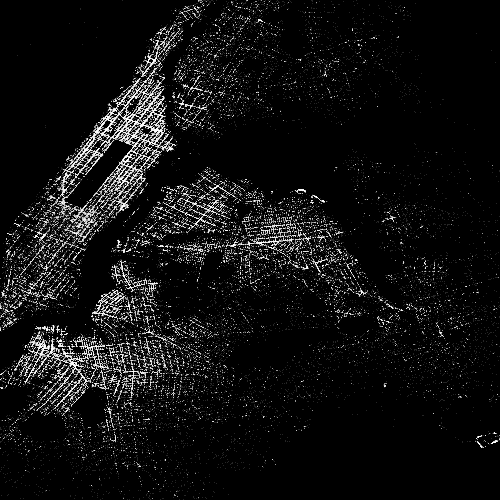

In [25]:
export(tf.shade(agg, cmap = cm(Greys9,0.2), how='eq_hist'),"sf_biz_grey") 

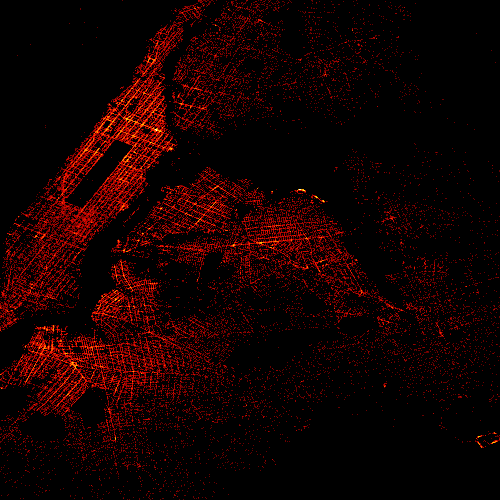

In [26]:
from colorcet import fire 
export(tf.shade(agg, cmap = cm(fire,0.2), how='log'),"sf_biz_fire") 

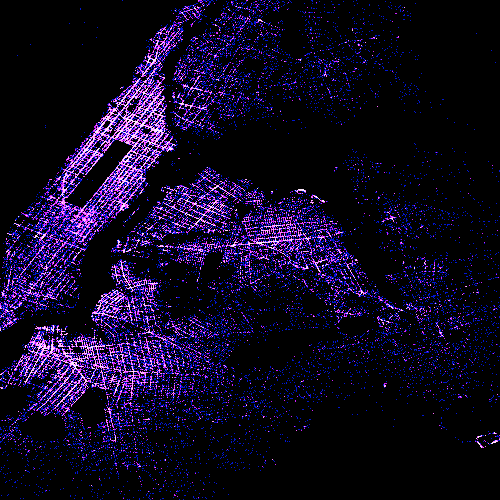

In [28]:
from colorcet import bmw 
export(tf.shade(agg, cmap = cm(bmw,0.2), how='eq_hist'),"sf_biz_bmw")